In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.getcwd()


'/home/vizziwo/capcookie/models'

In [10]:
X_train = pd.read_csv('../data/processed/X2_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X2_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y2_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y2_test.csv', index_col=0)

In [11]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,flee_Not fleeing,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
2835,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-1.533369
1157,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.501482
744,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.266692
1448,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.579746
3339,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.907261


SUPERVISED LEARNING

After the unsupervised attempt, I think that anything besides a decision tree-based model will probably not work since most of my data is binary. 

But I'm not sure when an SVM is appropriate so I want to try it out, first

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[469 208]
 [204 344]]
Accuracy: 0.6636734693877551
F1 Score: 0.6254545454545455
ROC-AUC Score: 0.7174039612286925


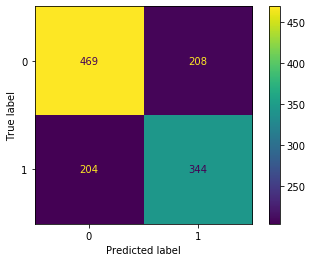

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print('Accuracy:', Accuracy_svm)
print('F1 Score:', f1_score(y_test, y_predict_svm))
predprob = svm.predict_proba(X_test)
print('ROC-AUC Score:', roc_auc_score(y_test, predprob[:,1]))
plot_confusion_matrix(svm, X_test, y_test)

In [13]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.68577982 0.68557744 0.70565657 0.65979798 0.62774411]
Mean cross validation test score: 0.6729111823396767
Mean cross validation train score: 0.7362094201811364
Standard deviation in cv scores: 0.02687123635385969


TRYING DUMMY CLASSIFIER

Because my data is imbalanced

In [14]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)


DummyClassifier(random_state=42, strategy='most_frequent')

Accuracy: 0.5526530612244898
F1 Score: 0.0
[[677   0]
 [548   0]]
ROC_AUC: 0.5


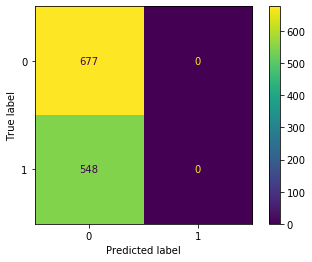

In [15]:
y_pred_dummy = dummy.predict(X_test)
print('Accuracy:', dummy.score(X_test, y_test))
print('F1 Score:', f1_score(y_test, y_pred_dummy))
print(confusion_matrix(y_test, y_pred_dummy))
plot_confusion_matrix(dummy, X_test, y_test)
predprob = dummy.predict_proba(X_test)[:,1]
print('ROC_AUC:', roc_auc_score(y_test, predprob))

The SVM does ok compared to this, given ROC_AUC. 0.5 compared to 0.67.

RANDOM FOREST

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.6506122448979592
ROC_AUC: 0.6902082502237221
F1 Score: 0.6000000000000001


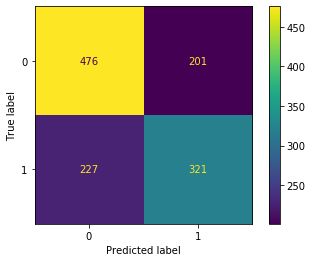

In [16]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
plot_confusion_matrix(rf, X_test, y_test)
Accuracy_rf=rf.score(X_test,y_test)
print('Accuracy:', Accuracy_rf)
predprob = rf.predict_proba(X_test)[:,1]
print('ROC_AUC:', roc_auc_score(y_test, predprob))
print('F1 Score:', f1_score(y_test, y_predict_rf))


In [17]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531:

[0.68524015 0.65164598 0.65875421 0.61882155 0.61959596]
Mean cross validation test score: 0.6468115695541491
Mean cross validation train score: 0.702845772190512
Standard deviation in cv scores: 0.025166981212040487


Random Forest does the same as SVM: 0.67. 

In [18]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print('Accuracy:', Accuracy_gbc)
print('F1 Score:', f1_score(y_test, y_predict_gbc))
print('ROC-AUC:', roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[481 196]
 [224 324]]
Accuracy: 0.6571428571428571
F1 Score: 0.6067415730337079
ROC-AUC: 0.6990479681721636


In [19]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.66992715 0.6472612  0.64619529 0.64154882 0.61050505]
Mean cross validation test score: 0.6430875002952716
Mean cross validation train score: 0.7080949891117567
Standard deviation in cv scores: 0.01903380250935999
